In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


In [56]:
df = pd.read_csv('THOR_FILTERED_CLEANED_IMPUTED_USA.csv', parse_dates=['MSNDATE'])


In [57]:
df["long_lat"] = list(zip(df["LATITUDE"], df["LONGITUDE"]))


In [58]:
df

,WWII_ID,MASTER_INDEX_NUMBER,MSNDATE,NAF,TGT_COUNTRY,TGT_TYPE,TGT_INDUSTRY,LATITUDE,LONGITUDE,AIRCRAFT_NAME,TGT_PRIORITY,AC_ATTACKING,ALTITUDE,TONS_OF_HE,TONS_OF_IC,TONS_OF_FRAG,TOTAL_TONS,SIGHTING_EXPLANATION,long_lat
0,124515,158710.0,1942-07-12,9,GERMANY,CITY AREA,CITIES TOWNS AND URBAN AREAS,48.13,11.58,B17,4.0,14.0,250.0,14.0,21.0,0.0,35.0,F.F.F.,"(48.13, 11.58)"
1,131180,93021.0,1942-10-21,9,FRANCE,MANPERTUS AD,AIR FIELDS AND AIRDROMES,49.63,-1.62,B17,4.0,5.0,75.4,8.0,0.0,0.0,8.0,NOT INDICATED,"(49.63, -1.62)"
2,131181,193136.0,1942-10-21,9,FRANCE,MANPERTUS AD,AIR FIELDS AND AIRDROMES,49.63,-1.62,B17,4.0,5.0,75.4,8.0,0.0,0.0,8.0,NOT INDICATED,"(49.63, -1.62)"
3,131182,193137.0,1942-10-21,9,FRANCE,MANPERTUS AD,AIR FIELDS AND AIRDROMES,49.63,-1.62,B17,4.0,5.0,75.4,8.0,0.0,0.0,8.0,NOT INDICATED,"(49.63, -1.62)"
4,140050,93208.0,1943-01-23,8,FRANCE,TORPEDO STOREHOUSE,SUPPLY DUMPS AND WAREHOUSES,47.75,-3.35,B17,4.0,6.0,230.0,10.0,0.0,0.0,10.0,NOT INDICATED,"(47.75, -3.35)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21338,116985,124915.0,1945-05-01,9,FRANCE,GUN POSITIONS,GUN EMPLACEMENTS,45.67,10.67,B26,NaN,12.0,127.0,21.0,0.0,0.0,21.0,NOT INDICATED,"(45.67, 10.67)"
21339,116984,192436.0,1945-05-01,15,AUSTRIA,MARSHALLING YARUS,"""RR INSTALLATIONS, TRACKS, MARSHALLING YARDS...",47.78,13.03,B17,4.0,27.0,257.0,77.0,0.0,0.0,77.0,F.F.F.,"(47.78, 13.03)"
21340,116986,225203.0,1945-05-01,9,FRANCE,GUN POSITIONS,GUN EMPLACEMENTS,45.67,10.67,B26,NaN,12.0,127.0,21.0,0.0,0.0,21.0,NOT INDICATED,"(45.67, 10.67)"
21341,116989,225207.0,1945-05-01,8,CZECHOSLOVAKIA,NaN,"""RR INSTALLATIONS, TRACKS, MARSHALLING YARDS...",49.63,13.17,B26,NaN,1.0,100.0,0.0,0.0,0.0,0.0,VISUAL,"(49.63, 13.17)"


In [59]:
df["MSNDATE"] = LabelEncoder().fit_transform(df["MSNDATE"])
df["AIRCRAFT_NAME"] = LabelEncoder().fit_transform(df["AIRCRAFT_NAME"])
df["TGT_COUNTRY"] = LabelEncoder().fit_transform(df["TGT_COUNTRY"])
df["NAF"]= LabelEncoder().fit_transform(df["NAF"])

df = df[["MSNDATE", "TOTAL_TONS", "NAF", "AIRCRAFT_NAME","TGT_COUNTRY"]]
df

,MSNDATE,TOTAL_TONS,NAF,AIRCRAFT_NAME,TGT_COUNTRY
0,0,35.0,2,2,7
1,1,8.0,2,2,6
2,1,8.0,2,2,6
3,1,8.0,2,2,6
4,2,10.0,1,2,6
...,...,...,...,...,...
21338,465,21.0,2,5,6
21339,465,77.0,4,2,1
21340,465,21.0,2,5,6
21341,465,0.0,1,5,4


In [72]:

x = df[["MSNDATE", "TOTAL_TONS", "NAF", "AIRCRAFT_NAME"]]
y = df["TGT_COUNTRY"]


Text(0.5, 1.0, 'K Fold for Decision Tree over ccp_alpha')

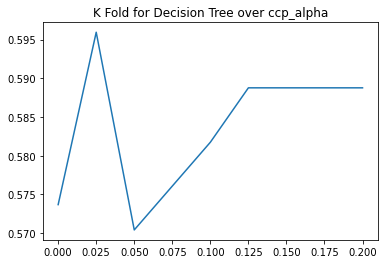

In [71]:

k = 5
kf = KFold(n_splits=k, random_state=None)
calrange = [0.0, 0.025, 0.05, 0.1, 0.125, 0.15, 0.175, 0.2]
acclist = []
for cal in calrange:
    clf = DecisionTreeClassifier(ccp_alpha = cal )
    acc_score = []

    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        clf.fit(X_train,y_train)
        pred_values = clf.predict(X_test)
        acc = accuracy_score(pred_values , y_test)
        acc_score.append(acc)

    avg_acc_score = sum(acc_score)/k
    acclist.append(avg_acc_score)
plt.plot(calrange,acclist)
plt.title("K Fold for Decision Tree over ccp_alpha")    
    


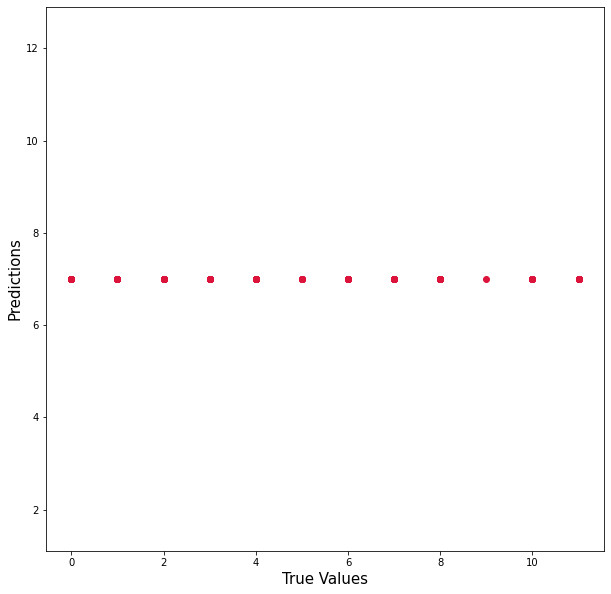

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
lf = DecisionTreeClassifier(max_depth = 3, ccp_alpha=.025)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
#plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

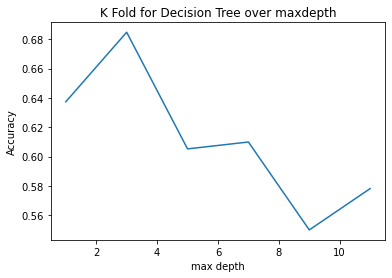

In [12]:

k = 5
kf = KFold(n_splits=k, random_state=None)
depthrange = [1,3,5,7,9,11]
acclist = []
for cal in depthrange:
    clf = DecisionTreeClassifier(max_depth = cal )
    acc_score = []

    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        clf.fit(X_train,y_train)
        pred_values = clf.predict(X_test)

        acc = accuracy_score(pred_values , y_test)
        acc_score.append(acc)

    avg_acc_score = sum(acc_score)/k
    acclist.append(avg_acc_score)
plt.plot(depthrange,acclist)
plt.title("K Fold for Decision Tree over maxdepth")
plt.xlabel("max depth")
plt.ylabel("Accuracy")
plt.show()

In [13]:
import graphviz

In [27]:

clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(x,y)
#plt.figure(figsize=(200,200))
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(clf, 
#                   feature_names=x.columns,  
#                   filled=True, label = "none", impurity = False)
#fig.savefig("decistion_tree.png")


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x.columns,  
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")


'decision_tree_graphivz.png'

Text(0, 0.5, 'Accuracy')

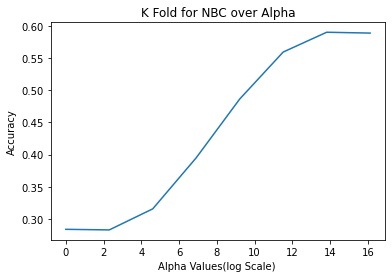

In [15]:
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

k = 5
kf = KFold(n_splits=k, random_state=None)
alpharange = [1,10,100,1000,10000,100000,1000000,10000000]
acclist = []
for cal in alpharange:
    clf  = MultinomialNB(alpha = cal )
    acc_score = []

    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        clf.fit(X_train,y_train)
        pred_values = clf.predict(X_test)

        acc = accuracy_score(pred_values , y_test)
        acc_score.append(acc)

    avg_acc_score = sum(acc_score)/k
    acclist.append(avg_acc_score)

plt.plot(np.log(alpharange),acclist)
plt.title("K Fold for NBC over Alpha")
plt.xlabel("Alpha Values(log Scale) ")
plt.ylabel("Accuracy")



#ac = accuracy_score(y_test,y_pred)
#cm = confusion_matrix(y_test, y_pred)

In [45]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	#agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [48]:

df.sort_values('MSNDATE')
df.head(50)
#Total TONS, NAF,  TGT_COUNTRY
#PREVIOUS VALUES OF THE 3 COLUMNS + #PRESENT INPUT VALUES SO TONS AND NAF 
usefuldf = df[["NAF", "TOTAL_TONS", "TGT_COUNTRY"]]
usefuldflist = usefuldf.values.tolist()
usefuldflist

[[9, 35.0, 'GERMANY'],
 [9, 8.0, 'FRANCE'],
 [9, 8.0, 'FRANCE'],
 [9, 8.0, 'FRANCE'],
 [8, 10.0, 'FRANCE'],
 [8, 10.0, 'FRANCE'],
 [8, 13.0, 'FRANCE'],
 [8, 3.0, 'FRANCE'],
 [8, 13.0, 'FRANCE'],
 [9, 13.0, 'FRANCE'],
 [9, 13.0, 'FRANCE'],
 [9, 13.0, 'FRANCE'],
 [8, 8.0, 'FRANCE'],
 [8, 8.0, 'FRANCE'],
 [8, 10.0, 'FRANCE'],
 [8, 10.0, 'FRANCE'],
 [8, 13.0, 'FRANCE'],
 [8, 3.0, 'FRANCE'],
 [8, 13.0, 'FRANCE'],
 [8, 10.0, 'FRANCE'],
 [8, 10.0, 'FRANCE'],
 [8, 13.0, 'FRANCE'],
 [8, 3.0, 'FRANCE'],
 [8, 13.0, 'FRANCE'],
 [8, 13.0, 'GERMANY'],
 [8, 13.0, 'GERMANY'],
 [9, 8.0, 'GERMANY'],
 [9, 8.0, 'GERMANY'],
 [9, 8.0, 'GERMANY'],
 [9, 14.0, 'GERMANY'],
 [9, 14.0, 'GERMANY'],
 [9, 14.0, 'GERMANY'],
 [9, 14.0, 'GERMANY'],
 [9, 9.0, 'FRANCE'],
 [9, 6.0, 'FRANCE'],
 [9, 15.0, 'FRANCE'],
 [9, 5.0, 'FRANCE'],
 [9, 15.0, 'FRANCE'],
 [9, 3.0, 'FRANCE'],
 [9, 13.0, 'FRANCE'],
 [9, 9.0, 'FRANCE'],
 [9, 6.0, 'FRANCE'],
 [9, 15.0, 'FRANCE'],
 [9, 5.0, 'FRANCE'],
 [9, 15.0, 'FRANCE'],
 [9, 3.0, 'FRANCE'

In [51]:
data = series_to_supervised(usefuldflist)
data

,0,1,2,0,1,2
1,9.0,35.0,GERMANY,9,8.0,FRANCE
2,9.0,8.0,FRANCE,9,8.0,FRANCE
3,9.0,8.0,FRANCE,9,8.0,FRANCE
4,9.0,8.0,FRANCE,8,10.0,FRANCE
5,8.0,10.0,FRANCE,8,10.0,FRANCE
...,...,...,...,...,...,...
21338,8.0,0.0,CZECHOSLOVAKIA,9,21.0,FRANCE
21339,9.0,21.0,FRANCE,15,77.0,AUSTRIA
21340,15.0,77.0,AUSTRIA,9,21.0,FRANCE
21341,9.0,21.0,FRANCE,8,0.0,CZECHOSLOVAKIA


In [21]:
raw = pd.DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
print(values)

[[ 0 50]
 [ 1 51]
 [ 2 52]
 [ 3 53]
 [ 4 54]
 [ 5 55]
 [ 6 56]
 [ 7 57]
 [ 8 58]
 [ 9 59]]
